# Amtrak Reviews Analysis

## Executive Summary

The goal of this analysis is to look at customer reviews of Amtrak's Northeastern Regional service from Washington D.C. to Boston to analyze how customers feel about the service as well as recommend where Amtrak invests its finances to better improve customer experiences! By scraping TripAdvisor, Yelp, and other discussion forums, I aim to look at how the customer experience is on Amtrak and what the company can do better to enhance the experience to bring back the train transport system in America!

## Data Scraping & Dataset Formation

In [74]:
from scrape import add_reviews_to_dict, print_review_count
import pandas as pd
from pprint import pprint
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [2]:
stops = ['2 S Station', 'Boston, MA 02111', 'Yelp users haven’t asked any questions yet about Amtrak.', 'Start your review of Amtrak.']
reviews = {}

In [3]:
# Scrape reviews off Yelp and add valid reviews to list
add_reviews_to_dict(0, 90, step=10, base_url='https://www.yelp.com/biz/amtrak-boston-3?start={}',
                    tag_type='span', class_names='raw__09f24__T4Ezm', stop_list=stops, review_dct=reviews)

In [4]:
# Loop through each page fo Trustpilot and add valid reviews to the list
add_reviews_to_dict(1, 30, base_url="https://www.trustpilot.com/review/www.amtrak.com?page={}",
                              tag_type='p', review_dct=reviews,
                              class_names='typography_body-l__KUYFJ typography_appearance-default__AAY17 typography_color-black__5LYEn',
                              stop_list=stops,
                              attrs={'data-service-review-text-typography': 'true'})

In [5]:
# Loop through each page fo ComplaintsBoard.com and add valid reviews to the list
add_reviews_to_dict(1, 13, base_url="https://www.complaintsboard.com/amtrak-b106889/page/{}",
                              tag_type='p', review_dct=reviews,
                              class_names='complaint-main__text',
                              stop_list=stops)

In [6]:
# Loop through each page fo Reddit.com and add valid reviews to the list
add_reviews_to_dict(0, 1, base_url="https://www.sitejabber.com/reviews/amtrak.com",
                              tag_type='p', review_dct=reviews,
                              stop_list=stops)

In [7]:
# Export data to dataframe
rows = []
# Loop through the dictionary and extract website_name and review
for website_name, review_list in reviews.items():
    for r in review_list:
        rows.append({'Website': website_name, 'Review': r})

# Create the DataFrame
df = pd.DataFrame(rows)

In [8]:
# Store as CSV file
df.to_csv('/Users/srihariraman/PycharmProjects/Amtrak Twitter Analysis/Amtrak-Twitter-Analysis/reviews.csv')

## Pre-Processing EDA

In [9]:
# Load dataset via CSV when offline
#df = pd.read_csv("reviews.csv")

In [15]:
df.tail()

,Website,Review
1182,sitejabber.com,On Friday December 30th we made a reservation ...
1183,sitejabber.com,The passengers are the culprits here... not th...
1184,sitejabber.com,Gain trust and grow your business with custome...
1185,sitejabber.com,"House Rules: On our Facebook page, we want our..."
1186,sitejabber.com,Claim your listing for free to respond to revi...


In [11]:
df.shape

(1187, 2)

In [12]:
df.nunique()

Website       4
Review     1037
dtype: int64

In [13]:
df.columns

Index(['Website', 'Review'], dtype='object')

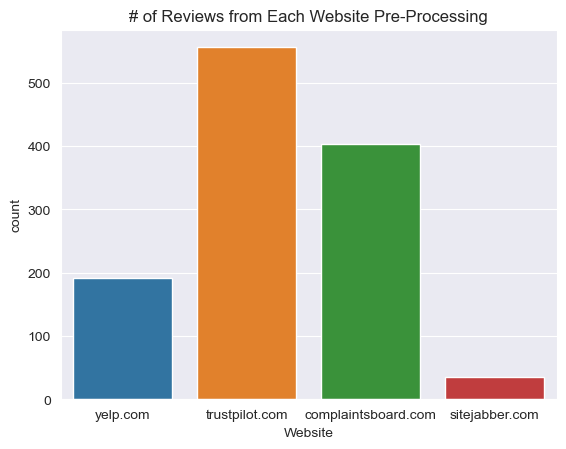

In [58]:
# Analyze count for number of reviews for each website
sns.set_style('darkgrid')
sns.countplot(data=df, x='Website')
plt.title('# of Reviews from Each Website Pre-Processing');

**Analysis**: There is likely to be a heavier bias on reviews from Trustpilot since a majority of the reviews are sourced from it. Therefore, if there are more negative reviews on it, it is more likely for it to contribute more to an overall sentiment metric about Amtrak. The converse is also true!

## Data Processing

In [77]:
# Store the review polarity and subjectivity for each review
sid_obj= SentimentIntensityAnalyzer()
df['review_polarity'] = [sid_obj.polarity_scores(review)['compound'] for review in df['Review']]
df['review_subjectivity'] = [TextBlob(review).sentiment.subjectivity for review in df['Review']]

In [88]:
df.tail()

,Website,Review,review_polarity,review_subjectivity
1182,sitejabber.com,On Friday December 30th we made a reservation ...,-0.5719,0.8
1183,sitejabber.com,The passengers are the culprits here... not th...,0.0000,0.0
1184,sitejabber.com,Gain trust and grow your business with custome...,0.7717,0.0
1185,sitejabber.com,"House Rules: On our Facebook page, we want our...",0.9242,0.7
1186,sitejabber.com,Claim your listing for free to respond to revi...,0.5106,0.8


## Post-Processing EDA

In [89]:
# Descriptive statistics of polarity and subjectivity
df.describe()

,review_polarity,review_subjectivity
count,1187.000000,1187.000000
mean,-0.054459,0.458725
std,0.713818,0.200865
min,-0.999600,0.000000
25%,-0.803500,0.369848
50%,-0.102700,0.492924
75%,0.666950,0.579804
max,0.999400,1.000000


Text(0.5, 1.0, 'Distribution of Polarity Scores Grouped by Website')

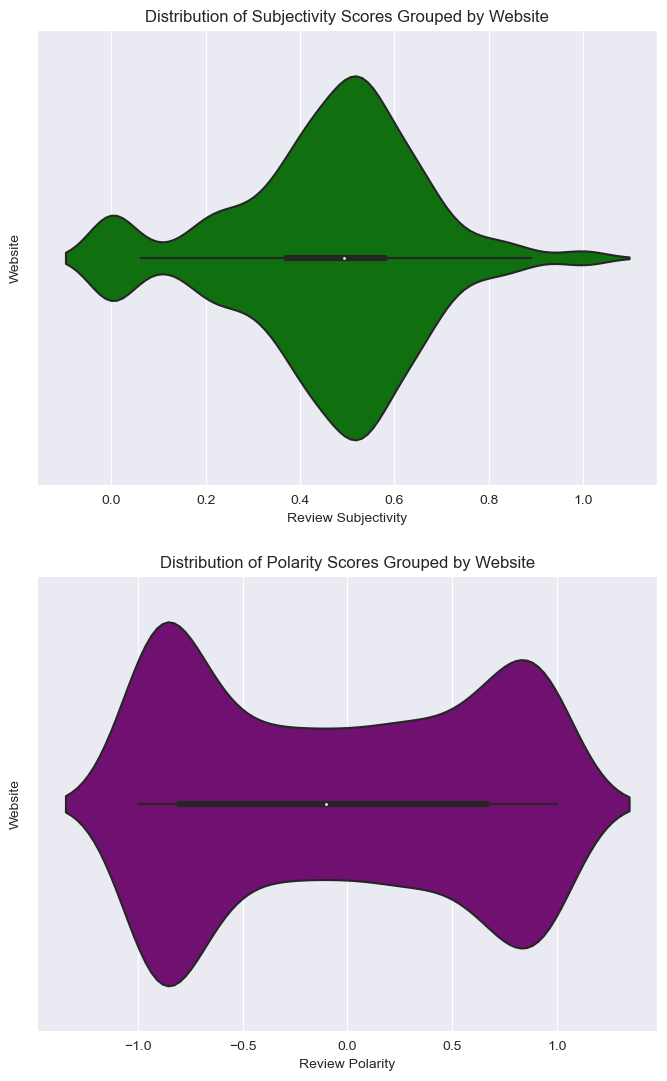

In [130]:
# Overall distribution of polarity and subjectivity
fig, ax = fig, ax = plt.subplots(2,1, figsize=(8, 13))
sns.violinplot(data=df, x='review_subjectivity', ax = ax[0], color='green')
ax[0].set_xlabel('Review Subjectivity')
ax[0].set_ylabel('Website')
ax[0].set_title('Distribution of Subjectivity Scores Grouped by Website')

sns.violinplot(data=df, x='review_polarity', ax= ax[1], color='purple')
ax[1].set_xlabel('Review Polarity')
ax[1].set_ylabel('Website')
ax[1].set_title('Distribution of Polarity Scores Grouped by Website')

Text(0.5, 1.0, 'Distribution of Polarity Scores Grouped by Website')

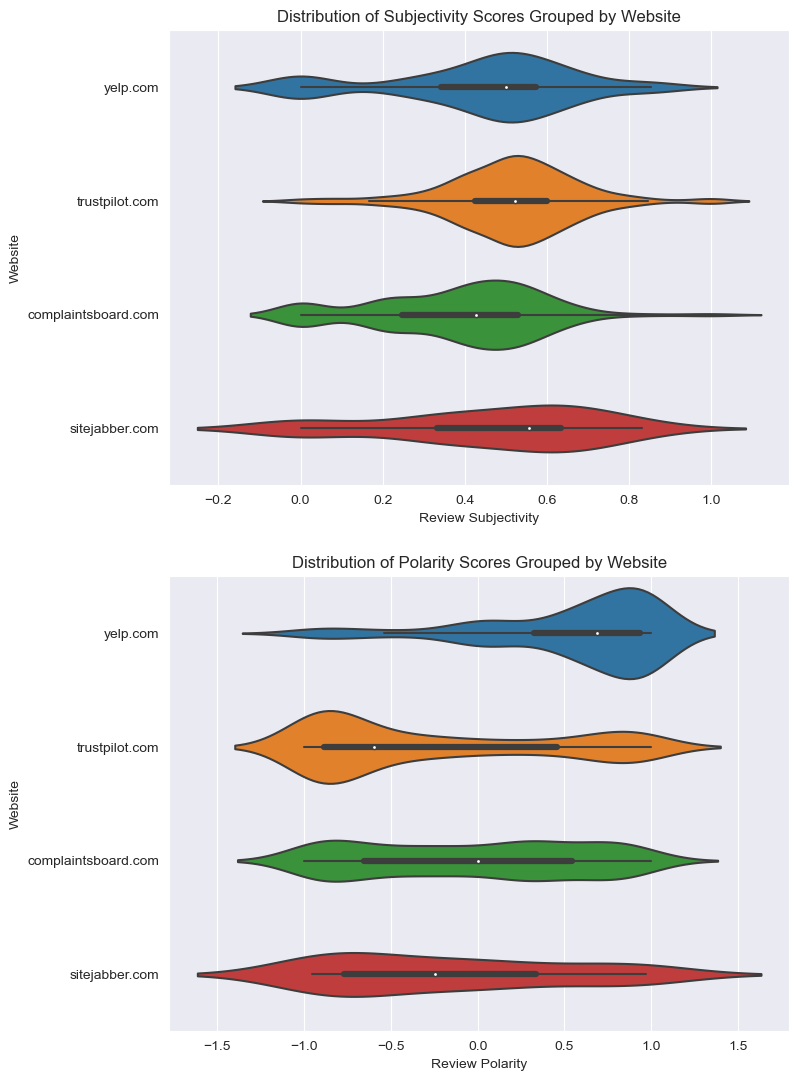

In [125]:
# Distribution of polarity and sentiment scores grouped by website
fig, ax = plt.subplots(2,1, figsize=(8, 13))
sns.violinplot(data=df, x='review_subjectivity', y='Website', ax = ax[0])
ax[0].set_xlabel('Review Subjectivity')
ax[0].set_ylabel('Website')
ax[0].set_title('Distribution of Subjectivity Scores Grouped by Website')

sns.violinplot(data=df, x='review_polarity', y='Website', ax= ax[1])
ax[1].set_xlabel('Review Polarity')
ax[1].set_ylabel('Website')
ax[1].set_title('Distribution of Polarity Scores Grouped by Website')

In [90]:
# Correlation between polarity and subjectivity of reviews
df.corr().loc['review_polarity', 'review_subjectivity' ]

-0.035183992283552346

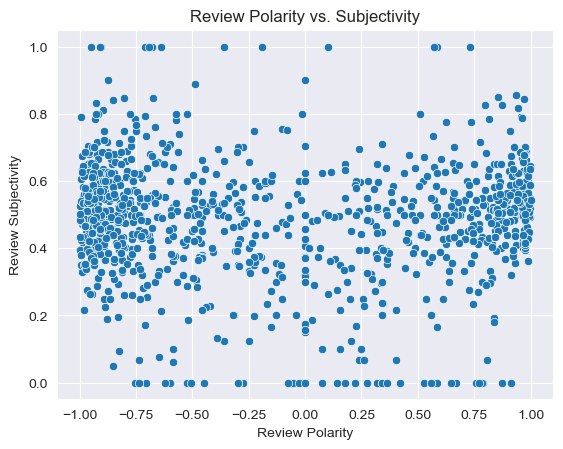

In [100]:
# Plot scatterplot of polarity vs. subjectivity score
sns.set_style('darkgrid')

sns.scatterplot(data=df, x='review_polarity', y='review_subjectivity')
plt.title('Review Polarity vs. Subjectivity')
plt.xlabel('Review Polarity')
plt.ylabel('Review Subjectivity');